# Import Modules and Data

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
# ImporModules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
import optuna
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Import Data
df = pd.read_csv('encoded_smoten.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'encoded_smoten.csv'

In [ ]:
# Delete columns and reformat
df = df.drop(columns=['day_of_week_bind','day_of_week_incident'])
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df['total_claim_amount_indicator'] = (df['total_claim_amount'] >= 20000).astype(int)
df['injury_claim_amount_indicator'] = (df['injury_claim'] >= 3000).astype(int)
df['property_claim_amount_indicator'] = (df['property_claim'] >= 3000).astype(int)
df['vehicle_claim_amount_indicator'] = (df['vehicle_claim'] >= 10000).astype(int)

# Splitting Data

In [ ]:
X = df.drop(columns=["fraud_reported","insured_zip"])  # Replace "target_column" with the name of your target variable
y = df["fraud_reported"]
X = X.drop(columns=['Unnamed0'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [ ]:
# Hyperparameter Tuning
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators',10,300),
        'max_depth': trial.suggest_int('max_depth',10,200),
        'min_samples_split': trial.suggest_int('min_samples_split',2,50),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,30),
    }

    skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    model = RandomForestRegressor(**params)

    error = cross_val_score(model, X_train, y_train, cv=skf, scoring='r2').mean()

    return error

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)
rf_best = study.best_params
print(study.best_value)
print(rf_best)

[I 2024-07-11 13:14:08,930] A new study created in memory with name: no-name-9fbafe00-a5bf-4a73-afb5-e463385b1707


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-07-11 13:14:13,132] Trial 0 finished with value: 0.8740930104939905 and parameters: {'n_estimators': 32, 'max_depth': 59, 'min_samples_split': 14, 'min_samples_leaf': 23}. Best is trial 0 with value: 0.8740930104939905.
[I 2024-07-11 13:14:39,221] Trial 1 finished with value: 0.9273276434752876 and parameters: {'n_estimators': 120, 'max_depth': 69, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9273276434752876.
[I 2024-07-11 13:14:42,900] Trial 2 finished with value: 0.9228682069650264 and parameters: {'n_estimators': 23, 'max_depth': 188, 'min_samples_split': 29, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9273276434752876.
[I 2024-07-11 13:15:06,669] Trial 3 finished with value: 0.8760574385769259 and parameters: {'n_estimators': 300, 'max_depth': 97, 'min_samples_split': 44, 'min_samples_leaf': 22}. Best is trial 1 with value: 0.9273276434752876.
[I 2024-07-11 13:15:17,970] Trial 4 finished with value: 0.874522726042023 and parameter

In [ ]:
# Tuned Hyperparameter
rf_best={'n_estimators': 299,
 'max_depth': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

{'n_estimators': 299,
 'max_depth': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

In [ ]:
# Fitting
rf = RandomForestRegressor(**rf_best)
rf = rf.fit(X_train, y_train.values.ravel())
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1.        , 0.07692308, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.04347826,
       0.        , 1.        , 0.99665552, 0.98996656, 0.        ,
       0.        , 0.02006689, 0.        , 0.        , 0.93979933,
       0.00334448, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       0.909699  , 0.        , 0.        , 0.        , 0.        ,
       0.04347826, 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.56521739, 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.71571906, 1.        ,
       0.77926421, 0.00334448, 0.        , 0.        , 1.        ,
       0.83277592, 0.35785953, 0.00668896, 0.        , 1.        ,
       1.        , 0.01672241, 0.04013378, 0.66555184, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.     

# XGBoost

In [ ]:
#Hyperparameter Tuning
def objective(trial):
    params = {
        'objective' : 'binary:logistic',
        'verbosity': 0,
        'max_depth': trial.suggest_int('max_depth',5,300),
        'random_state': 42,
        'lambda': trial.suggest_float('lambda', 0.0, 3.0),
        'alpha': trial.suggest_float('alpha', 0.0, 3.0),
        'subsample': trial.suggest_float('subsample', 0.0, 1.0),
        'objective': 'reg:squaredlogerror',
        'learning_rate': trial.suggest_float('learning_rate', 0.0, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators',10,300)
    }

    skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    model = XGBRegressor(**params)

    error = cross_val_score(model, X_train, y_train, cv=skf, scoring='r2').mean()

    return error

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)
xgb_best = study.best_params
print(study.best_value)
print(xgb_best)

[I 2024-07-11 13:35:06,555] A new study created in memory with name: no-name-cb8a67bd-f018-4ce7-ba4b-8e6ffca6bd4d


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-07-11 13:35:09,912] Trial 0 finished with value: 0.8451451829191502 and parameters: {'max_depth': 171, 'lambda': 1.1026322300688811, 'alpha': 2.168419267452222, 'subsample': 0.8913352641890327, 'learning_rate': 0.016589735958898233, 'colsample_bytree': 0.5735405890425553, 'n_estimators': 157}. Best is trial 0 with value: 0.8451451829191502.
[I 2024-07-11 13:35:11,487] Trial 1 finished with value: 0.819548813829958 and parameters: {'max_depth': 97, 'lambda': 1.036093069345766, 'alpha': 1.7187897895392892, 'subsample': 0.17749520930943719, 'learning_rate': 0.2230369370222418, 'colsample_bytree': 0.13777688175109915, 'n_estimators': 112}. Best is trial 0 with value: 0.8451451829191502.
[I 2024-07-11 13:35:16,135] Trial 2 finished with value: 0.737020365820029 and parameters: {'max_depth': 179, 'lambda': 2.67971740864363, 'alpha': 2.185233582118853, 'subsample': 0.7760984045242393, 'learning_rate': 0.017807248608503468, 'colsample_bytree': 0.8094576511821675, 'n_estimators': 87}. B

In [ ]:
#Tuned Hyperparameter
xgb_best = {'objective' : 'binary:logistic',
'max_depth': 219,
 'lambda': 0.7119890243597445,
 'alpha': 0.013530742199898305,
 'subsample': 0.8736024864322983,
 'learning_rate': 0.07681058021176695,
 'colsample_bytree': 0.9753999739636062,
 'n_estimators': 183}


In [ ]:
# Fitting
xg_reg = XGBRegressor(**xgb_best)
xg_reg.fit(X_train,y_train)
y_pred_xgb = xg_reg.predict(X_test)
y_pred_xgb

array([9.9983227e-01, 3.6277376e-02, 4.8306820e-04, 1.4089309e-03,
       9.9987757e-01, 9.9988282e-01, 6.0085015e-04, 1.9612238e-03,
       9.9986911e-01, 8.0796238e-04, 9.9972934e-01, 9.9971157e-01,
       9.9986649e-01, 9.9958545e-01, 7.3256143e-03, 1.1444493e-03,
       9.9986660e-01, 9.9970359e-01, 9.9680823e-01, 5.2609207e-04,
       7.2841858e-04, 7.1962099e-03, 4.0662699e-04, 6.5975107e-04,
       9.9645448e-01, 8.6418325e-03, 9.9942291e-01, 9.9834263e-01,
       9.9849570e-01, 9.9988461e-01, 9.9972135e-01, 9.9970108e-01,
       9.9975342e-01, 1.0234227e-03, 9.9979740e-01, 9.7210467e-01,
       1.1086082e-03, 6.3381216e-04, 4.5343893e-04, 1.6638641e-03,
       4.0923646e-03, 3.4140161e-04, 3.6244802e-04, 6.0085015e-04,
       5.7684345e-04, 9.9975342e-01, 3.3621806e-01, 4.3544394e-04,
       3.6707004e-03, 1.3507084e-03, 9.9988711e-01, 1.0002904e-03,
       8.5653167e-04, 6.5806597e-01, 9.9983227e-01, 9.9661535e-01,
       6.6047610e-04, 7.8599993e-04, 3.3501364e-04, 9.9982172e

# LightGBM

In [ ]:
# Tuning Hyperparameter
def objective(trial):
    params = {
        'objective' : 'binary',
        'verbosity': -1,
        'max_depth': trial.suggest_int('max_depth',5,300),
        'random_state': 42,
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 10.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.0, 1.0),
        'objective': 'regression',
        'learning_rate': trial.suggest_float('learning_rate', 1e-9, 1.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators',10,300),
        'boosting_type':'gbdt',
        'num_leaves': trial.suggest_int('num_leaves',20,300),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    model = LGBMRegressor(**params)

    error = cross_val_score(model, X_train, y_train, cv=skf, scoring='r2').mean()

    return error

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, show_progress_bar=True)
lgb_best = study.best_params
print(study.best_value)
print(lgb_best)

[I 2024-07-11 13:44:29,933] A new study created in memory with name: no-name-0e76bda9-bf6b-41c5-a65c-59d72fb3be73


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-07-11 13:44:30,504] Trial 0 finished with value: 0.000547645756391324 and parameters: {'max_depth': 218, 'reg_lambda': 5.274103768925023e-07, 'reg_alpha': 0.000108575236706303, 'subsample': 0.8669277599606852, 'learning_rate': 5.5563946925032524e-06, 'colsample_bytree': 0.5618392159776121, 'n_estimators': 64, 'num_leaves': 167, 'min_child_samples': 56}. Best is trial 0 with value: 0.000547645756391324.
[I 2024-07-11 13:44:31,400] Trial 1 finished with value: 0.0019132346571762327 and parameters: {'max_depth': 36, 'reg_lambda': 5.304796973750886e-07, 'reg_alpha': 4.3570524328260234e-08, 'subsample': 0.7075782649153978, 'learning_rate': 6.577701011336223e-06, 'colsample_bytree': 0.9324733110657617, 'n_estimators': 173, 'num_leaves': 44, 'min_child_samples': 60}. Best is trial 1 with value: 0.0019132346571762327.
[I 2024-07-11 13:44:32,195] Trial 2 finished with value: 0.0001252173320300809 and parameters: {'max_depth': 223, 'reg_lambda': 1.2786525049787808e-05, 'reg_alpha': 7.084

In [ ]:
# Tuned Hyperparameter
lgb_best = {'objective' : 'binary',
'max_depth': 64,
 'reg_lambda': 6.871085988632186e-09,
 'reg_alpha': 0.6273839271858418,
 'subsample': 0.04240897872783493,
 'learning_rate': 0.3285566276955278,
 'colsample_bytree': 0.9848528431818249,
 'n_estimators': 279,
 'num_leaves': 127,
 'min_child_samples': 5}

In [ ]:
# Fitting
lgb_reg = LGBMRegressor(**lgb_best)
lgb_reg.fit(X_train,y_train)
y_pred_lgb = lgb_reg.predict(X_test)
y_pred_lgb

[LightGBM] [Info] Number of positive: 1197, number of negative: 1174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2346
[LightGBM] [Info] Number of data points in the train set: 2371, number of used features: 172
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504850 -> initscore=0.019402
[LightGBM] [Info] Start training from score 0.019402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

array([9.99599026e-01, 2.23238403e-02, 4.86432069e-04, 1.34822386e-03,
       9.99731337e-01, 9.99711623e-01, 8.28032868e-04, 1.19707812e-03,
       9.99634071e-01, 5.87115591e-04, 9.99677388e-01, 9.99609323e-01,
       9.99735352e-01, 9.99125857e-01, 1.00921093e-02, 1.41847258e-03,
       9.99758281e-01, 9.99659435e-01, 9.97492841e-01, 4.27864485e-04,
       3.53455308e-04, 7.44207292e-03, 8.79051676e-04, 1.51174410e-03,
       9.76786704e-01, 6.35970348e-03, 9.99005585e-01, 9.97688870e-01,
       9.98794226e-01, 9.99758281e-01, 9.99634800e-01, 9.99644840e-01,
       9.99645192e-01, 7.97803203e-04, 9.99710203e-01, 9.95533186e-01,
       4.90666622e-04, 3.14221146e-04, 3.92140430e-04, 1.08168161e-03,
       4.24954252e-03, 4.74438493e-04, 4.78146767e-04, 8.28032868e-04,
       5.85691701e-04, 9.99645192e-01, 2.49022698e-01, 3.71593414e-04,
       2.96624252e-03, 1.79328861e-03, 9.99766248e-01, 7.75691358e-04,
       8.40196944e-04, 7.13649187e-01, 9.99599026e-01, 9.93796511e-01,
      

# Compare Performance

In [ ]:
from sklearn.metrics import mean_squared_log_error


print("R2 of RF", r2_score(y_test, y_pred_rf))
print("R2 of xgb", r2_score(y_test, y_pred_xgb))
print("R2 of lgbm", r2_score(y_test, y_pred_lgb))

R2 of RF 0.9238150013939641
R2 of xgb 0.8988449709431424
R2 of lgbm 0.9135779864403161


# Ensemble

In [ ]:
y_pred_rf1 = rf.predict(X_train)
y_pred_xgb1 = xg_reg.predict(X_train)
y_pred_lgb1 = lgb_reg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
import optuna


def objective(trial):
    # Define parameters to optimize (weights for RF and XGB)
    w_rf = trial.suggest_uniform('w_rf', 0.0, 1.0)
    w_lgb = 1.0 - w_rf  # Ensures weights sum up to 1

    # Combine predictions using the suggested weights
    ensemble_preds = w_rf * y_pred_rf1 + w_lgb * y_pred_lgb1

    # Convert probabilities to binary predictions
    ensemble_binary_preds = [1 if pred >= 0.5 else 0 for pred in ensemble_preds]

    # Evaluate the ensemble model using accuracy (you can choose other metrics as well)
    accuracy = r2_score(y_train, ensemble_binary_preds)

    return accuracy




In [ ]:
# Initialize Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can adjust n_trials as needed

# Get the best parameters
best_w_rf = study.best_params['w_rf']
best_w_lgb = 1.0 - best_w_rf

print(f"Best weights - Random Forest: {best_w_rf}, XGBoost: {best_w_lgb}")
print(f"Best r2: {study.best_value}")

[I 2024-07-11 14:04:37,027] A new study created in memory with name: no-name-30919eac-8668-4ef0-9a8a-a87b5ddf3674
<ipython-input-21-c6f12ff6ce00>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  w_rf = trial.suggest_uniform('w_rf', 0.0, 1.0)
[I 2024-07-11 14:04:37,036] Trial 0 finished with value: 1.0 and parameters: {'w_rf': 0.22999191311224276}. Best is trial 0 with value: 1.0.
<ipython-input-21-c6f12ff6ce00>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  w_rf = trial.suggest_uniform('w_rf', 0.0, 1.0)
[I 2024-07-11 14:04:37,046] Trial 1 finished with value: 1.0 and parameters: {'w_rf': 0.4890752115243029}. Best is trial 0 with value: 1.0.
<ipython-input-21-c6f12ff6ce00>:7: FutureWarning: suggest_unifo

Best weights - Random Forest: 0.22999191311224276, XGBoost: 0.7700080868877572
Best r2: 1.0


In [27]:
ensemble = best_w_rf * y_pred_rf + best_w_lgb * y_pred_lgb
print("R2 of Ensemble", r2_score(y_test, ensemble))

R2 of Ensemble 0.9184163202985011


# Feature Importance

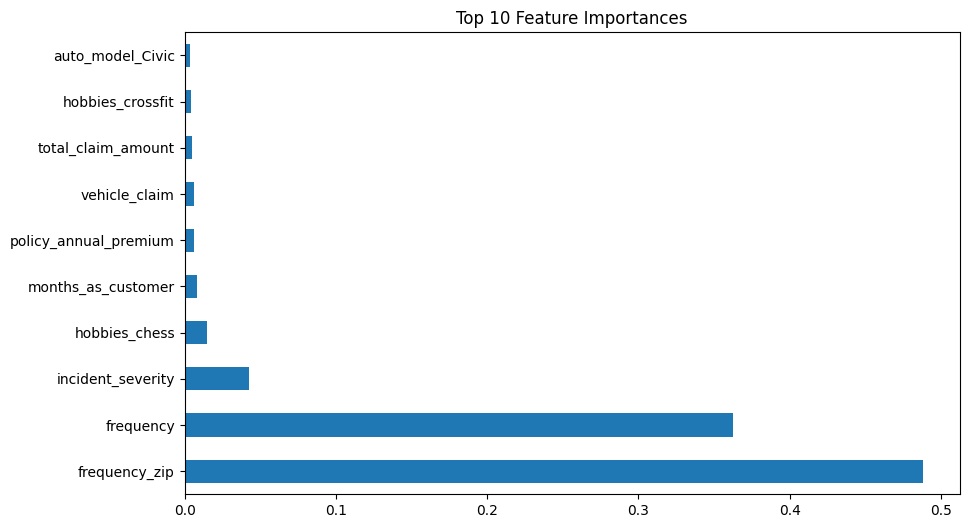

In [ ]:
importances_rf = rf.feature_importances_

feature_names = X.columns
feature_importances = pd.Series(importances_rf, index=feature_names)

top_features = feature_importances.nlargest(10)
top_features.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.show()

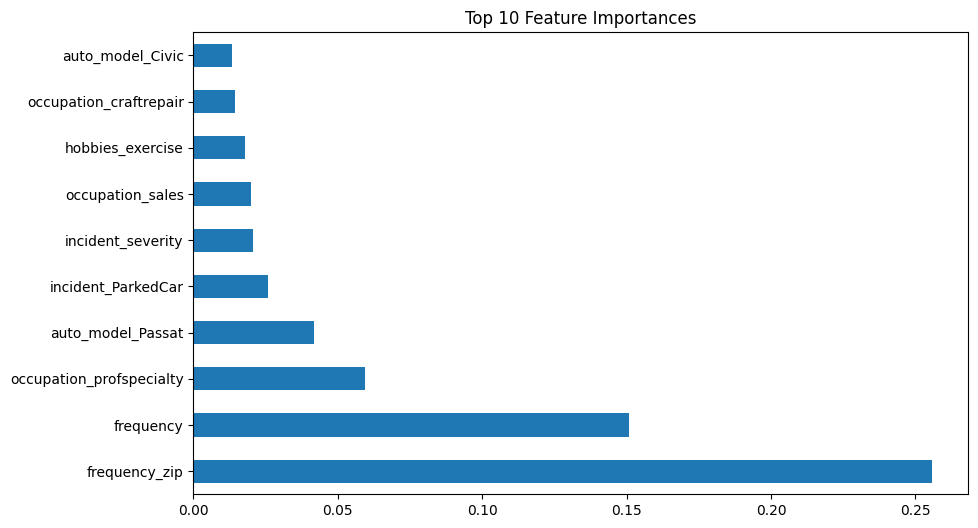

In [ ]:
importances_xg = xg_reg.feature_importances_

feature_names = X.columns  # Assuming X_train is a DataFrame
feature_importances = pd.Series(importances_xg, index=feature_names)

top_features = feature_importances.nlargest(10)
top_features.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.show()


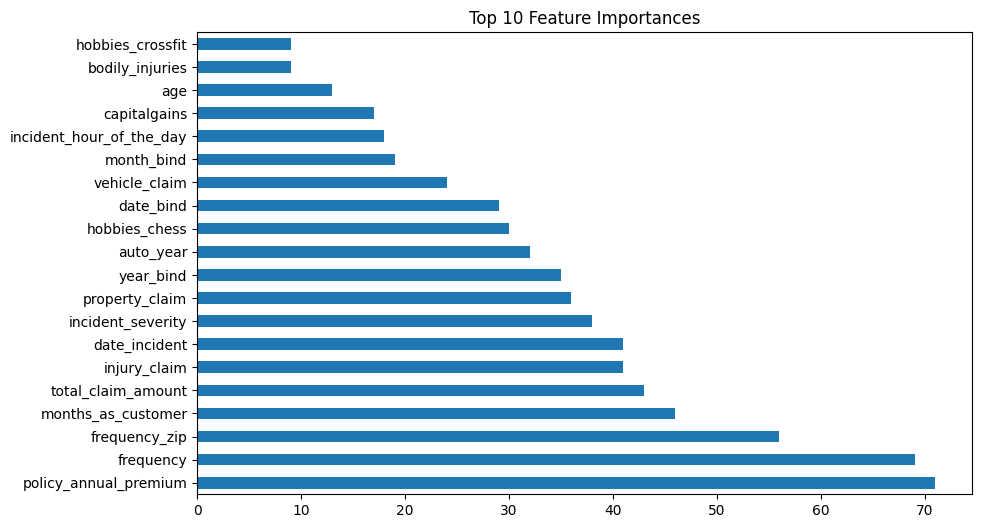

In [ ]:
importances_lgb = lgb_reg.feature_importances_

feature_names = X.columns  # Assuming X_train is a DataFrame
feature_importances = pd.Series(importances_lgb, index=feature_names)

top_features = feature_importances.nlargest(20)
top_features.plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.show()
